In [21]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import pos_tag
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Abhinav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Abhinav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Abhinav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

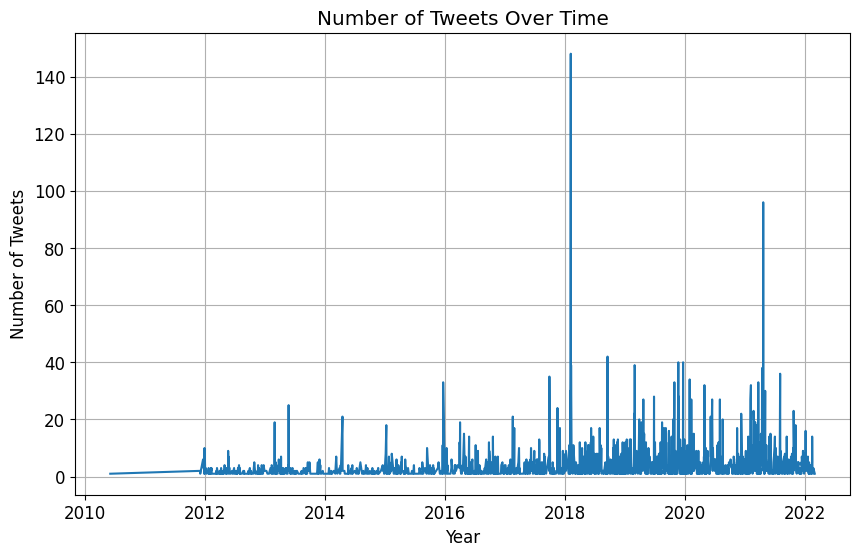

In [71]:
df = pd.read_csv(r'../dataset/elon_twitter_data_v4.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
tweets_per_day = df.groupby(df['created_at'].dt.date).size()
plt.figure(figsize=(10, 6))
tweets_per_day.plot()
plt.title('Number of Tweets Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

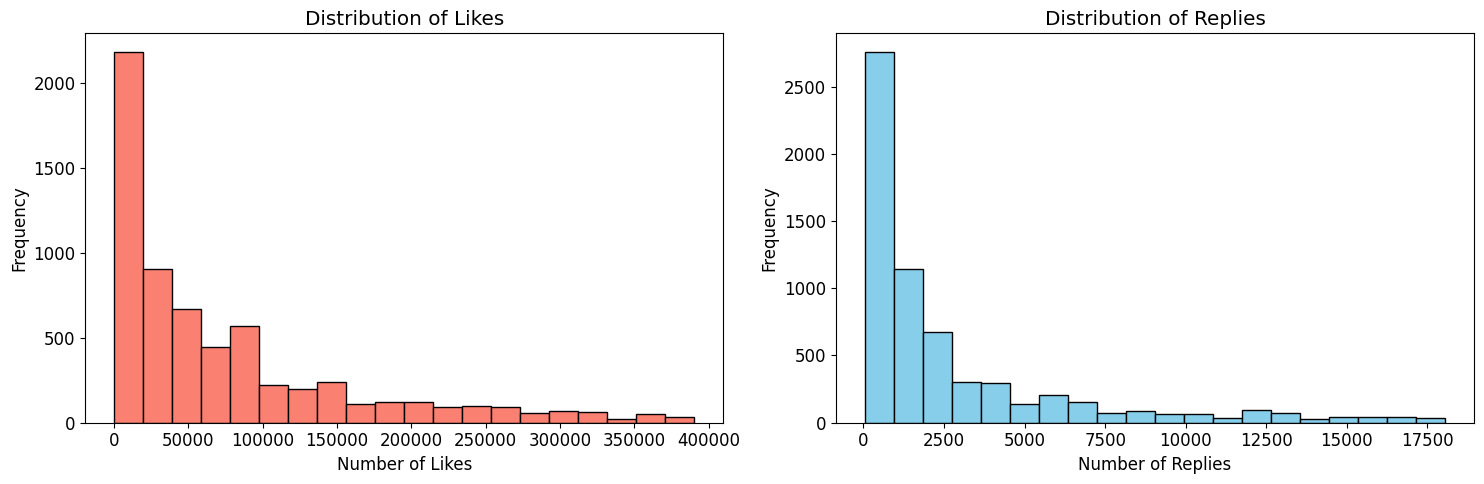

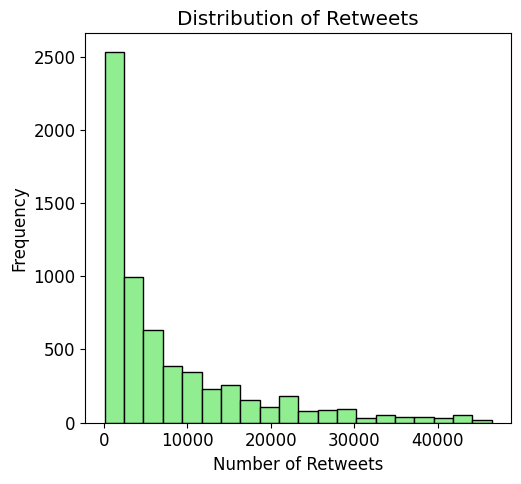

In [69]:
plt.figure(figsize=(15, 5))

likes_5th, likes_95th = np.percentile(df['num_likes'], [5, 95])
retweets_5th, retweets_95th = np.percentile(df['num_retweets'], [5, 95])
replies_5th, replies_95th = np.percentile(df['num_replies'], [5, 95])

plt.subplot(1, 2, 1)
plt.hist(df['num_likes'], bins=20, range=(likes_5th, likes_95th), color='salmon', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(df['num_replies'], bins=20, range=(replies_5th, replies_95th), color='skyblue', edgecolor='black')
plt.title('Distribution of Replies')
plt.xlabel('Number of Replies')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.hist(df['num_retweets'], bins=20, range=(retweets_5th, retweets_95th), color='lightgreen', edgecolor='black')
plt.title('Distribution of Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

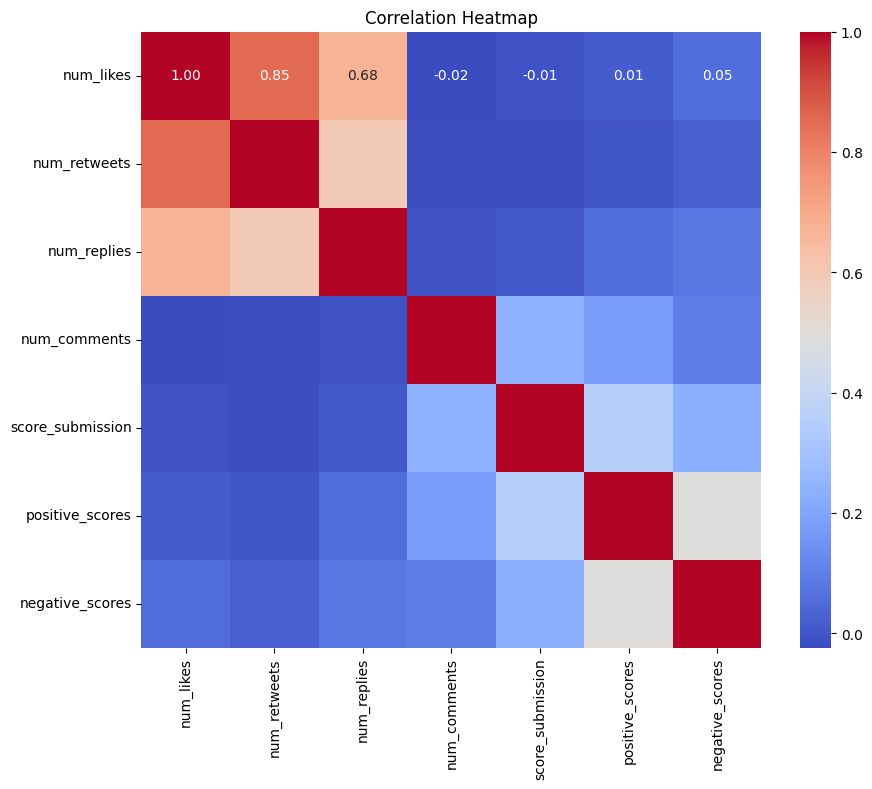

In [17]:
numerical_cols = ['num_likes', 'num_retweets', 'num_replies', 'num_comments', 'score_submission', 'positive_scores', 'negative_scores']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

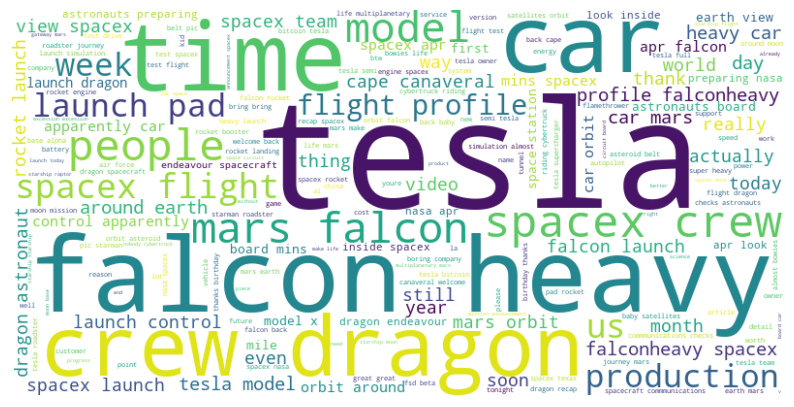

In [22]:
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)   
    filtered_tokens = []
    for word, tag in tagged_tokens:
        if tag.startswith('JJ'):  
            continue
        elif tag.startswith('DT'):  
            continue
        elif tag.startswith('CD'):  
            continue
        elif tag.startswith('FW'): 
            continue
        elif tag.startswith('VB'):  
            continue
        elif word.lower() in stop_words:  
            continue
        elif word.lower() == 'amp':  
            continue
        elif word.lower() == 'u':  
            continue
        elif not word.isalpha():  
            continue
        filtered_tokens.append(word.lower())
    return filtered_tokens

text = ' '.join(df['tweet_content'])
filtered_text = process_text(text)
filtered_text = ' '.join(filtered_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

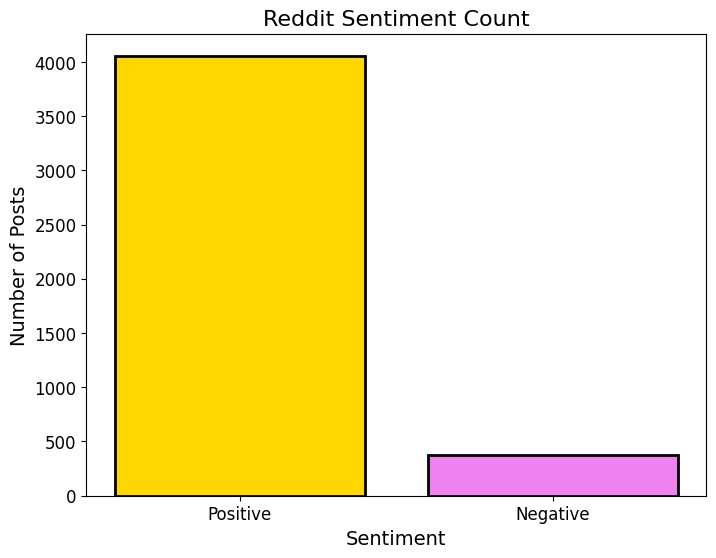

In [68]:
filtered_df = df[df['score_submission'] > 0]
positive_sum = len(filtered_df['score_submission'])

filtered_df = df[df['score_submission'] <= 0]
negative_sum = len(filtered_df['score_submission'])

plt.rcParams.update({'font.size': 12})
colors = ['gold', 'violet']
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_sum, negative_sum], color=colors, edgecolor='black', linewidth=2)
plt.title('Reddit Sentiment Count', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_url          7054 non-null   object             
 1   created_at         7054 non-null   datetime64[ns, UTC]
 2   tweet_content      7054 non-null   object             
 3   num_likes          7054 non-null   int64              
 4   num_retweets       7054 non-null   int64              
 5   num_replies        7054 non-null   int64              
 6   title_submission   4400 non-null   object             
 7   num_comments       4436 non-null   float64            
 8   score_submission   4436 non-null   float64            
 9   positive_comments  1283 non-null   object             
 10  positive_scores    4436 non-null   float64            
 11  negative_comments  327 non-null    object             
 12  negative_scores    4436 non-null   float64      

In [37]:
temp = df[df['title_submission'].notnull()]
len(temp[temp['title_submission'] != ''])

4400

In [41]:
temp['tweet_content'].value_counts()

1218